# Qstick

https://www.investopedia.com/terms/q/qstick.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^nsebank'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


In [3]:
n = 7
CO = df['Adj Close'] - df['Open']
df['QStick'] = CO.rolling(n).mean()

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,QStick
Date,,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,QStick
Date,,,,,,,
2022-12-23 00:00:00+05:30,41951.351562,42226.648438,41597.648438,41668.050781,41667.566406,332600,-265.670201
2022-12-27 00:00:00+05:30,42827.750000,42927.199219,42394.148438,42859.500000,42859.000000,229600,-198.005022
2022-12-28 00:00:00+05:30,42733.601562,43034.949219,42694.851562,42827.699219,42827.203125,230500,-178.525670
2022-12-29 00:00:00+05:30,42684.898438,43498.050781,42489.800781,43252.351562,43251.847656,308300,-107.089286
2022-12-30 00:00:00+05:30,43401.699219,43422.949219,42833.101562,42986.449219,42985.949219,258700,-195.960379


Text(0.5, 0, 'Date')

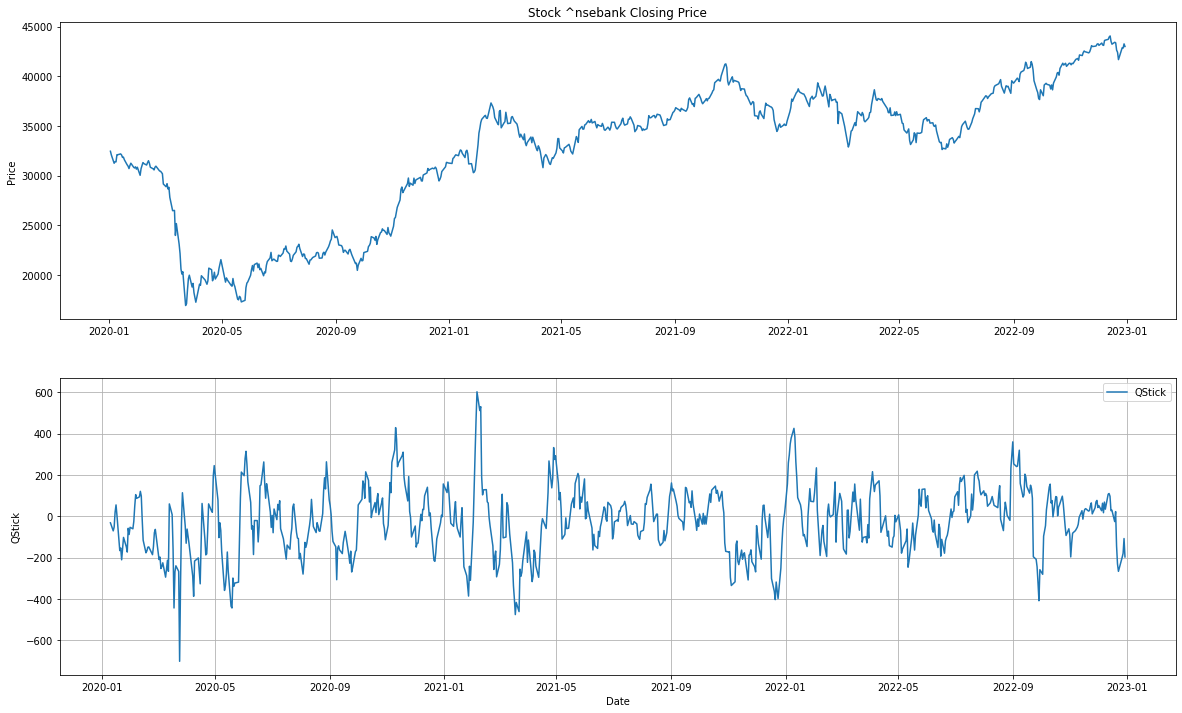

In [6]:
fig = plt.figure(figsize=(20,12))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['QStick'], label='QStick')
ax2.grid()
ax2.set_ylabel('QStick')
ax2.legend(loc='best')
ax2.set_xlabel('Date')

## Candlestick with QStick

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,QStick,VolumePositive
0,18262.770833,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN,True
1,18263.770833,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN,False
2,18266.770833,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN,False
3,18267.770833,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN,False
4,18268.770833,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN,True


Text(0.5, 0, 'Date')

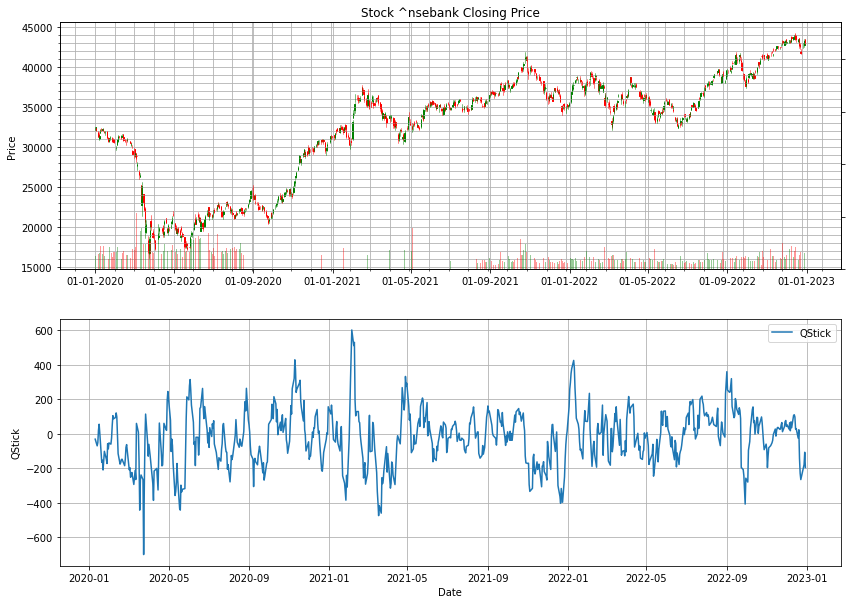

In [8]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['QStick'], label='QStick')
ax2.grid()
ax2.set_ylabel('QStick')
ax2.legend(loc='best')
ax2.set_xlabel('Date')